In [1]:
import torch
from torch.utils import data
from PIL import Image
import numpy as np
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
all_imgs_path = glob.glob(r'../data/birds/*/*.jpg')
all_imgs_path[:5]

['../data/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0001_796111.jpg',
 '../data/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0002_55.jpg',
 '../data/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0003_796136.jpg',
 '../data/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0005_796090.jpg',
 '../data/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0006_796065.jpg']

In [3]:
label_names = [img.split('\\')[1].split('.')[1] for img in all_imgs_path]
unique_labels = np.unique(label_names)

In [4]:
label_to_idx = dict((v, k) for k, v in enumerate(unique_labels))
label_to_idx

{'Acadian_Flycatcher': 0,
 'American_Crow': 1,
 'American_Goldfinch': 2,
 'American_Pipit': 3,
 'American_Redstart': 4,
 'American_Three_toed_Woodpecker': 5,
 'Anna_Hummingbird': 6,
 'Artic_Tern': 7,
 'Baird_Sparrow': 8,
 'Baltimore_Oriole': 9,
 'Bank_Swallow': 10,
 'Barn_Swallow': 11,
 'Bay_breasted_Warbler': 12,
 'Belted_Kingfisher': 13,
 'Bewick_Wren': 14,
 'Black_Tern': 15,
 'Black_and_white_Warbler': 16,
 'Black_billed_Cuckoo': 17,
 'Black_capped_Vireo': 18,
 'Black_footed_Albatross': 19,
 'Black_throated_Blue_Warbler': 20,
 'Black_throated_Sparrow': 21,
 'Blue_Grosbeak': 22,
 'Blue_Jay': 23,
 'Blue_headed_Vireo': 24,
 'Blue_winged_Warbler': 25,
 'Boat_tailed_Grackle': 26,
 'Bobolink': 27,
 'Bohemian_Waxwing': 28,
 'Brandt_Cormorant': 29,
 'Brewer_Blackbird': 30,
 'Brewer_Sparrow': 31,
 'Bronzed_Cowbird': 32,
 'Brown_Creeper': 33,
 'Brown_Pelican': 34,
 'Brown_Thrasher': 35,
 'Cactus_Wren': 36,
 'California_Gull': 37,
 'Canada_Warbler': 38,
 'Cape_Glossy_Starling': 39,
 'Cape_May_

In [5]:
idx_to_label = dict((v, k) for k, v in label_to_idx.items())
idx_to_label

{0: 'Acadian_Flycatcher',
 1: 'American_Crow',
 2: 'American_Goldfinch',
 3: 'American_Pipit',
 4: 'American_Redstart',
 5: 'American_Three_toed_Woodpecker',
 6: 'Anna_Hummingbird',
 7: 'Artic_Tern',
 8: 'Baird_Sparrow',
 9: 'Baltimore_Oriole',
 10: 'Bank_Swallow',
 11: 'Barn_Swallow',
 12: 'Bay_breasted_Warbler',
 13: 'Belted_Kingfisher',
 14: 'Bewick_Wren',
 15: 'Black_Tern',
 16: 'Black_and_white_Warbler',
 17: 'Black_billed_Cuckoo',
 18: 'Black_capped_Vireo',
 19: 'Black_footed_Albatross',
 20: 'Black_throated_Blue_Warbler',
 21: 'Black_throated_Sparrow',
 22: 'Blue_Grosbeak',
 23: 'Blue_Jay',
 24: 'Blue_headed_Vireo',
 25: 'Blue_winged_Warbler',
 26: 'Boat_tailed_Grackle',
 27: 'Bobolink',
 28: 'Bohemian_Waxwing',
 29: 'Brandt_Cormorant',
 30: 'Brewer_Blackbird',
 31: 'Brewer_Sparrow',
 32: 'Bronzed_Cowbird',
 33: 'Brown_Creeper',
 34: 'Brown_Pelican',
 35: 'Brown_Thrasher',
 36: 'Cactus_Wren',
 37: 'California_Gull',
 38: 'Canada_Warbler',
 39: 'Cape_Glossy_Starling',
 40: 'Cape_

In [6]:
all_labels = [label_to_idx.get(l) for l in label_names]
all_labels[:5]

[19, 19, 19, 19, 19]

In [7]:
np.random.seed(2021)
random_index = np.random.permutation(len(all_imgs_path))

In [8]:
all_imgs_path = np.array(all_imgs_path)[random_index]
all_labels = np.array(all_labels)[random_index]

In [9]:
s = int(len(all_imgs_path)*0.8)
train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]

In [10]:
class MyDataset(data.Dataset):
    def __init__(self, imgs, labels, trans):
        super().__init__()
        self.imgs = imgs
        self.labels = labels
        self.trans = trans

    def __getitem__(self, index):
        npimg = self.imgs[index]
        label = self.labels[index]

        pilimg = Image.open(npimg)
        img_data = np.asarray(pilimg, dtype=np.uint8)
        if len(img_data.shape) == 2:
            img_data = np.repeat(img_data[:, :, np.newaxis], 3, axis=2)
        tensorimg = self.trans(Image.fromarray(img_data))

        return tensorimg, label

    def __len__(self):
        return len(self.imgs)

In [11]:
trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [12]:
train_dataset = MyDataset(train_imgs, train_labels, trans)
test_dataset = MyDataset(test_imgs, test_labels, trans)

In [13]:
BATCHSIZE = 32
train_iter = data.DataLoader(train_dataset, batch_size=BATCHSIZE, shuffle=True)
test_iter = data.DataLoader(test_dataset, batch_size=BATCHSIZE)

In [14]:
imgs, labels = next(iter(train_iter))
imgs.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

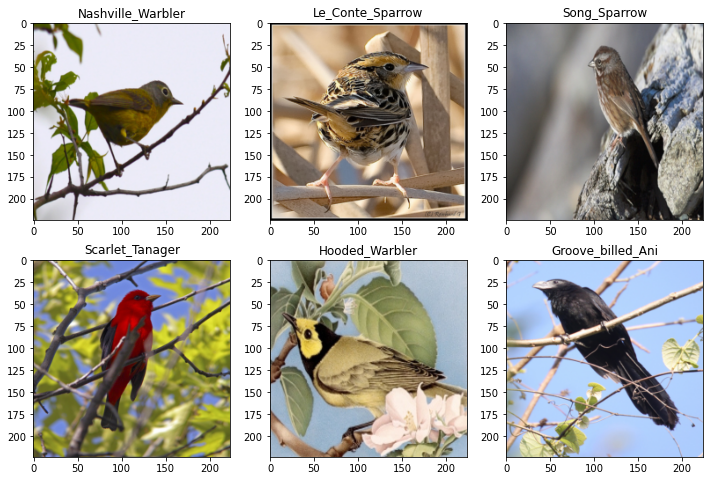

In [15]:
plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs[:6], labels[:6])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i + 1)
    plt.title(idx_to_label.get(label.item()))
    plt.imshow(img)

In [16]:
my_densenet = torchvision.models.densenet121(pretrained=True).features

In [17]:
for p in my_densenet.parameters():
    p.requires_grad = False

In [18]:
if torch.cuda.is_available():
    my_densenet = my_densenet.cuda()

In [19]:
train_X = []
train_Y = []

for img, label in train_iter:
    out = my_densenet(img.cuda())
    out = out.view(out.size(0), -1)

    train_X.extend(out.cpu().data)
    train_Y.extend(label)

test_X = []
test_Y = []

for img, label in test_iter:
    out = my_densenet(img.cuda())
    out = out.view(out.size(0), -1)
    
    test_X.extend(out.cpu().data)
    test_Y.extend(label)

In [20]:
class FeaturesDataset(data.Dataset):
    def __init__(self, featureslist, labelslist) -> None:
        super().__init__()
        self.featureslist = featureslist
        self.labelslist = labelslist
    def __getitem__(self, index):
        return (
            self.featureslist[index],
            self.labelslist[index])
    def __len__(self):
        return len(self.labelslist)

In [21]:
train_features_dataset = FeaturesDataset(train_X, train_Y)
test_features_dataset = FeaturesDataset(test_X, test_Y)

In [22]:
train_features_iter = data.DataLoader(
    train_features_dataset, batch_size=64, shuffle=True
)
test_features_iter = data.DataLoader(
    test_features_dataset, batch_size=64
)

In [23]:
class FCModel(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc = torch.nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.fc(x)

In [24]:
in_features = train_X[0].shape[0]
out_features = 200

In [28]:
net = FCModel(in_features, out_features)
loss = torch.nn.CrossEntropyLoss()
opt = torch.optim.Adam(net.parameters(), lr=0.00001)

In [29]:
def fit(epoch, model, train_iter, test_iter, loss, opt, device):

    model.to(device)

    train_correct = 0
    train_total = 0
    train_running_loss = 0

    for x, y in train_iter:
        x, y = x.to(device), y.to(device)
        y_hat = model(x)
        opt.zero_grad()
        l = loss(y_hat, y.long())
        l.backward()
        opt.step()
        with torch.no_grad():
            y_hat = torch.argmax(y_hat, dim=1)
            train_correct += (y_hat == y).sum().item()
            train_total += y.size(0)
            train_running_loss += l.item()
    train_loss = train_running_loss / len(train_iter.dataset)
    train_acc = train_correct / train_total

    test_correct = 0
    test_total = 0
    test_running_loss = 0
    with torch.no_grad():
        for x, y in test_iter:
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            l = loss(y_hat, y.long())
            y_hat = torch.argmax(y_hat, dim=1)
            test_correct += (y_hat == y).sum().item()
            test_total += y.size(0)
            test_running_loss += l.item()
    test_loss = test_running_loss / len(test_iter.dataset)
    test_acc = test_correct / test_total

    print(
        'epoch: ', epoch,
        'train_loss: ', round(train_loss, 3),
        'train_accuracy', round(train_acc * 100, 3), '%',
        'test_loss: ', round(test_loss, 3),
        'test_accuracy', round(test_acc * 100, 3), '%',
    )

    return train_loss, train_acc, test_loss, test_acc

In [30]:
num_epochs = 50

all_train_loss = []
all_train_acc = []
all_test_loss = []
all_test_acc = []

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

for epoch in range(num_epochs):
    train_loss, train_acc, test_loss, test_acc = fit(
        epoch, net, train_features_iter, test_features_iter, loss, opt, device
    )
    all_train_loss.append(train_loss)
    all_train_acc.append(train_acc)
    all_test_loss.append(test_loss)
    all_test_acc.append(test_acc)

epoch:  0 train_loss:  0.07 train_accura 12.291 % test_loss:  0.055 test_accura 28.159 %
epoch:  1 train_loss:  0.039 train_accura 58.25 % test_loss:  0.041 test_accura 44.911 %
epoch:  2 train_loss:  0.023 train_accura 81.177 % test_loss:  0.034 test_accura 51.442 %
epoch:  3 train_loss:  0.015 train_accura 91.368 % test_loss:  0.031 test_accura 55.683 %
epoch:  4 train_loss:  0.01 train_accura 96.151 % test_loss:  0.029 test_accura 57.337 %
epoch:  5 train_loss:  0.007 train_accura 98.505 % test_loss:  0.027 test_accura 58.524 %
epoch:  6 train_loss:  0.005 train_accura 99.512 % test_loss:  0.026 test_accura 59.754 %
epoch:  7 train_loss:  0.004 train_accura 99.745 % test_loss:  0.026 test_accura 60.433 %
epoch:  8 train_loss:  0.003 train_accura 99.905 % test_loss:  0.025 test_accura 60.178 %
epoch:  9 train_loss:  0.002 train_accura 99.958 % test_loss:  0.025 test_accura 60.857 %
epoch:  10 train_loss:  0.002 train_accura 99.989 % test_loss:  0.024 test_accura 60.984 %
epoch:  11 t

KeyboardInterrupt: 

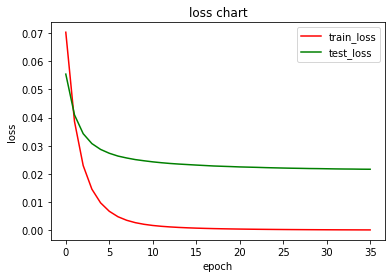

In [31]:
plt.title('loss chart')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(all_train_loss, color='r', label='train_loss')
plt.plot(all_test_loss, color='g', label='test_loss')
plt.legend()

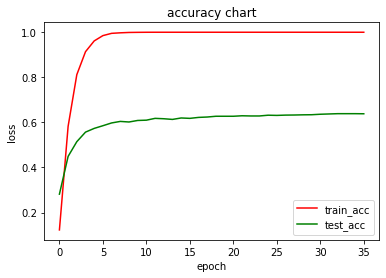

In [32]:
plt.title('accuracy chart')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.plot(all_train_acc, color='r', label='train_acc')
plt.plot(all_test_acc, color='g', label='test_acc')
plt.legend()